In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from matplotlib.pyplot import MultipleLocator
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor,NearestNeighbors
from sklearn.metrics import classification_report,f1_score,precision_recall_curve,roc_curve, roc_auc_score,confusion_matrix, accuracy_score, r2_score, precision_score, recall_score,mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from collections import Counter

# Data Cleaning

In [2]:
df = pd.read_csv('Data2015_2016.csv')

In [3]:
df = df.dropna()

In [4]:
df.isnull().sum()

SEQN                        0
Age                         0
Body_Mass_Index             0
Gender                      0
Physical_Activity           0
Total_Caffeine              0
Food_Security               0
Count_Meds                  0
Heart_Medication            0
Eye_Medication              0
Diabetes                    0
Race_and_Ethnicity          0
Total_Sodium_Intake         0
Diastolic_Blood_Pressure    0
Systolic_Blood_Pressure     0
dtype: int64

In [5]:
data2015_2016 = df.loc[~((df['Diastolic_Blood_Pressure'] == 0) | (df['Systolic_Blood_Pressure'] == 0))]
data2015_2016

,SEQN,Age,Body_Mass_Index,Gender,Physical_Activity,Total_Caffeine,Food_Security,Count_Meds,Heart_Medication,Eye_Medication,Diabetes,Race_and_Ethnicity,Total_Sodium_Intake,Diastolic_Blood_Pressure,Systolic_Blood_Pressure
0,83732,62,27.8,1,0,360,2,9,0,0,1,3,3164,70,128
1,83733,53,30.8,1,0,192,2,1,0,0,2,4,982,88,146
2,83734,78,28.8,1,8,306,2,7,1,0,1,5,6260,46,138
3,83735,56,42.4,2,2,248,2,5,0,0,2,2,2402,72,132
4,83736,42,20.3,2,5,0,2,1,0,0,2,4,2532,70,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9537,93696,26,33.8,1,0,0,2,1,0,0,2,0,0,68,118
9538,93697,80,31.0,2,2,13,2,4,0,0,2,0,0,56,154
9541,93700,35,26.0,1,0,0,2,2,0,0,2,0,0,62,104
9542,93701,8,18.1,1,0,5,2,1,0,0,2,0,0,48,114


In [6]:
data2015_2016.to_csv("Data2015_2016_clean.csv", index = False)

# Label the Target Category

In [7]:
data2015_2016['Sy_Label'] = pd.cut(x=data2015_2016['Systolic_Blood_Pressure'],
                     bins=[0,140,250],
                     labels=['0', '1'])

In [8]:
data2015_2016['Da_Label'] = pd.cut(x=data2015_2016['Diastolic_Blood_Pressure'],
                     bins=[0,140,250],
                     labels=['0', '1'])

# Combine Systolic and Diastolic Pressure

In [9]:
class_list = []
for sys, dia in zip(data2015_2016["Sy_Label"],data2015_2016["Da_Label"]):
    if int(sys) + int(dia) >0:
        class_list.append(1)
    else:
        class_list.append(0)

In [10]:
data2015_2016["target"] = class_list

# Split X and Y

In [11]:
X = data2015_2016.drop(["Diastolic_Blood_Pressure","Systolic_Blood_Pressure","Sy_Label","Da_Label","SEQN"], axis=1)
y = data2015_2016["target"].values
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Find the Optimal K with Cross Validation

In [13]:
k_list = list(range(1,30,2))

cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=8, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

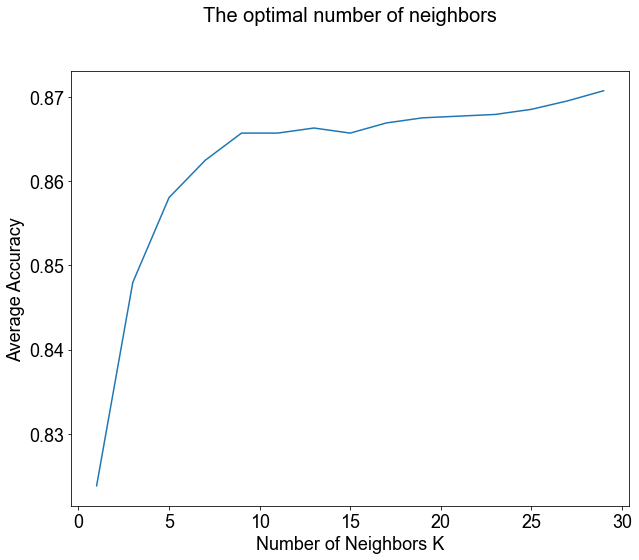

In [14]:
plt.figure()
plt.figure(figsize=(10,8))
plt.title('The optimal number of neighbors', fontsize=20, y = 1.1)
plt.xlabel('Number of Neighbors K', fontsize=18)
plt.ylabel('Average Accuracy', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize = 18)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()

In [15]:
# Double Check with whole data 

k_range = range(1,31)
k_error = []

for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(KNN, X, y, cv=8, scoring='accuracy')
    a = scores.mean()
    random_state = 42
    print(a)
    k_error.append(1-a)

0.8186823277346291
0.8618610590350844
0.8477503156444887
0.8663754128884978
0.8603086620499675
0.8689150756909108
0.8652465853005318
0.867927172207981
0.8646812947163025
0.8691980398158421
0.8665168152427594
0.8686332274808382
0.8676454834143169
0.8696211309637678
0.8686338651464718
0.868773992169466
0.8680692122278761
0.8683502633559067
0.8675039216436469
0.8675034433944218
0.8670800334136792
0.8684910280445346
0.8677857698537195
0.870184827383913
0.869196764484575
0.8703255920725408
0.8690556809631302
0.8696206527145427
0.8686327492316129
0.8699031385902489


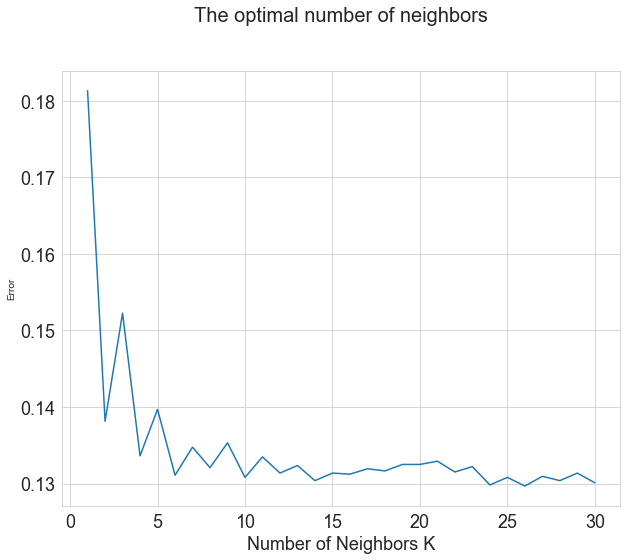

In [16]:
plt.figure(figsize=(10,8))
plt.plot(k_range,k_error)
plt.xlabel('Number of Neighbors K', size = 18)
plt.ylabel('Error', size = 10)
plt.title('The optimal number of neighbors',fontsize=20, y = 1.1) #fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize = 18)
sns.set_style("whitegrid")
plt.show()

In this regard,the optimal k will be 5

# Define the Confusion Matrxi and Roc Curve Function

In [17]:
def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig,ax = plt.subplots(figsize = (10,8))
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',
               fmt = 'g',annot_kws={"fontsize":18})
    ax.xaxis.set_label_position('top')
    
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.xlabel('Prediction',fontsize=20)
    plt.show()

In [18]:
def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(10,8),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.ylabel('TPR',fontsize=20)
    plt.xlabel('FPR',fontsize=20)
    plt.title('ROC Curve',y = 1.1,fontsize=20)
    plt.show()

# KNN model with the optimal K = 5

In [19]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

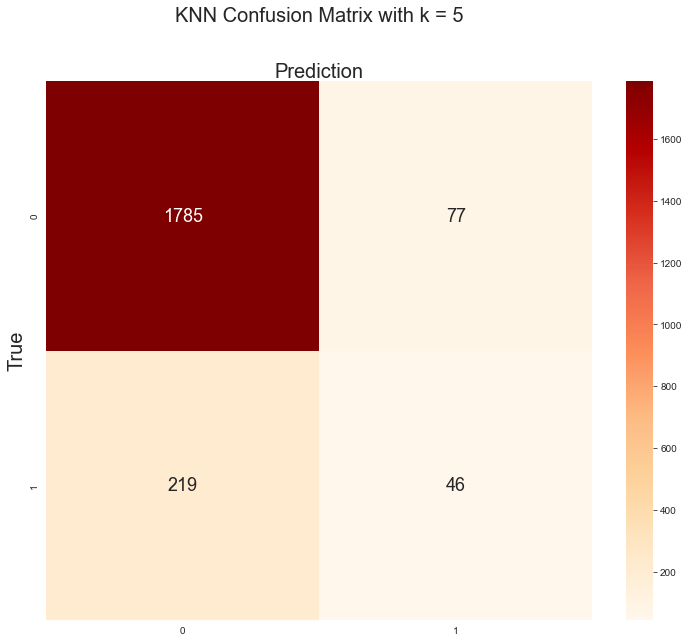

In [20]:
Conf_matrix = confusion_matrix(y_test, y_pred)
plot_cnf_matirx(Conf_matrix,'KNN Confusion Matrix with k = 5')

In [21]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal to 86.08%


In [22]:
TN=Conf_matrix[0,0]
TP=Conf_matrix[1,1]
FN=Conf_matrix[1,0]
FP=Conf_matrix[0,1]

In [23]:
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),3))
print('Specificity or True Negative Rate = TN/(TN+FP) = ', round(TN/float(TN+FP),3))

Sensitivity or True Positive Rate = TP/(TP+FN) =  0.174
Specificity or True Negative Rate = TN/(TN+FP) =  0.959


In [24]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.374
F1 Score: 0.237


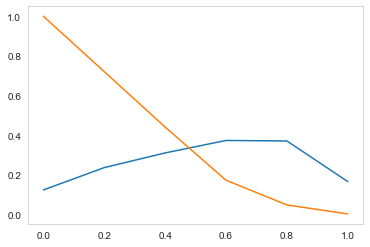

In [25]:
y_pred = classifier.predict_proba(X_test)[:,1]
precisions,recalls,thresholds = precision_recall_curve(y_test,y_pred)
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()

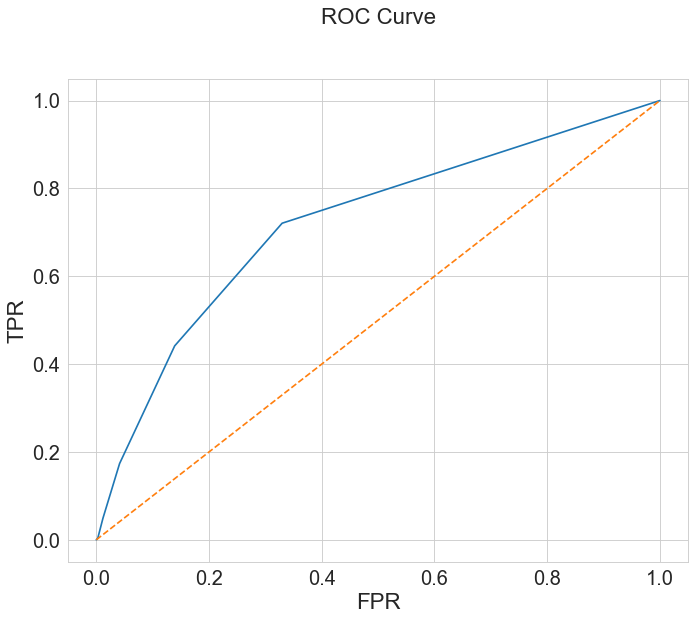

In [26]:
fprs,tprs,thresholds = roc_curve(y_test,y_pred)
plot_roc_curve(fprs,tprs, )

In [27]:
roc_auc_score(y_test,y_pred)

0.7210566848387816

# KNN with the Best Parameter

In [28]:
param_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[5,7,9]
    },
    {
        'weights':['distance'],
        'n_neighbors':[5,7,9],
        'p':[i for i in range(1,6)]
    }
]

In [29]:
knn_para = KNeighborsClassifier()
grid_search = GridSearchCV(knn_para,param_grid)
grid_search.fit(X_train,y_train)
y_pred_para =grid_search.predict(X_test)

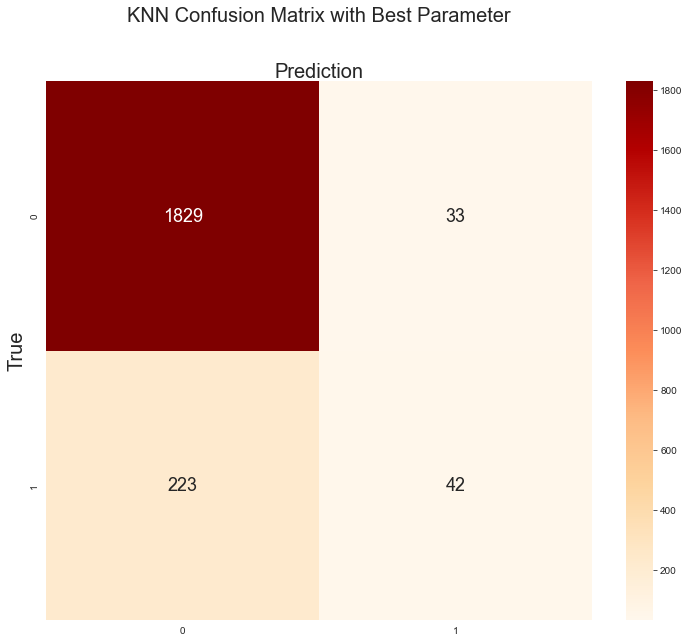

In [30]:
Conf_matrix = confusion_matrix(y_test, y_pred_para)
plot_cnf_matirx(Conf_matrix,'KNN Confusion Matrix with Best Parameter')

In [31]:
accuracy = accuracy_score(y_test, y_pred_para)*100
print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal to 87.96%


In [32]:
TN=Conf_matrix[0,0]
TP=Conf_matrix[1,1]
FN=Conf_matrix[1,0]
FP=Conf_matrix[0,1]

In [33]:
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),3))
print('Specificity or True Negative Rate = TN/(TN+FP) = ', round(TN/float(TN+FP),3))

Sensitivity or True Positive Rate = TP/(TP+FN) =  0.158
Specificity or True Negative Rate = TN/(TN+FP) =  0.982


In [34]:
print('Precision: %.3f' % precision_score(y_test, y_pred_para))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_para))

Precision: 0.560
F1 Score: 0.247


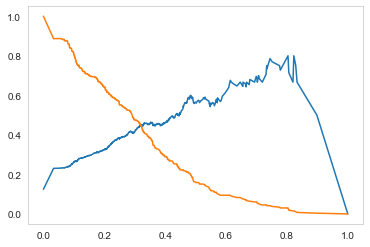

In [35]:
y_pred_para = grid_search.predict_proba(X_test)[:,1]
precisions,recalls,thresholds = precision_recall_curve(y_test,y_pred_para)
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()

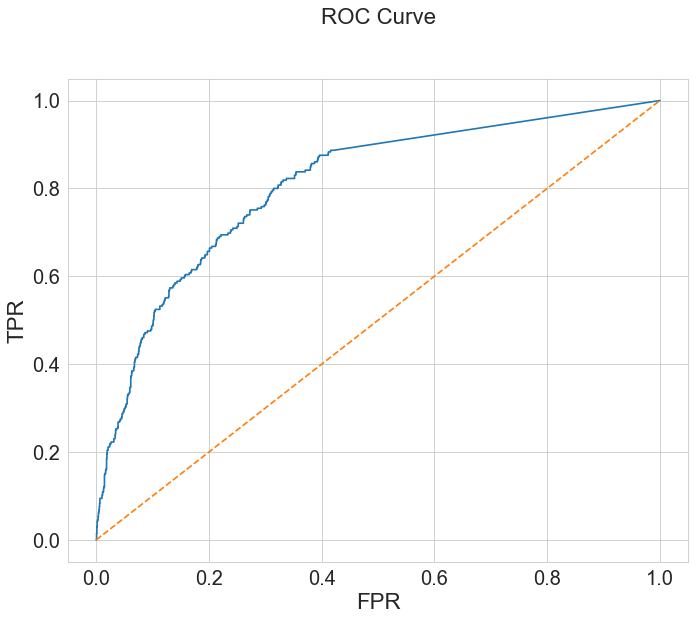

In [36]:
fprs,tprs,thresholds = roc_curve(y_test,y_pred_para)
plot_roc_curve(fprs,tprs)

In [37]:
roc_auc_score(y_test,y_pred_para)

0.8078086050706281

# Imbalanced Data - undersampling

In [38]:
data2015_2016.groupby(['target']).size()

target
0    6175
1     912
dtype: int64

In [39]:
undersampling = NearMiss(version = 2, n_neighbors = 5)
X,y = undersampling.fit_resample(X,y)
counter = Counter(y)
print(counter)

Counter({0: 912, 1: 912})


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Revised KNN with Best Parameter & Re-sampling data

In [41]:
param_grid_imb = [
    {
        'weights':['uniform'],
        'n_neighbors':[5,7,9]
    },
    {
        'weights':['distance'],
        'n_neighbors':[5,7,9],
        'p':[i for i in range(1,6)]
    }
]

In [42]:
knn_para_imb = KNeighborsClassifier()
grid_search = GridSearchCV(knn_para_imb,param_grid_imb)
grid_search.fit(X_train,y_train)
y_pred_para_imb =grid_search.predict(X_test)

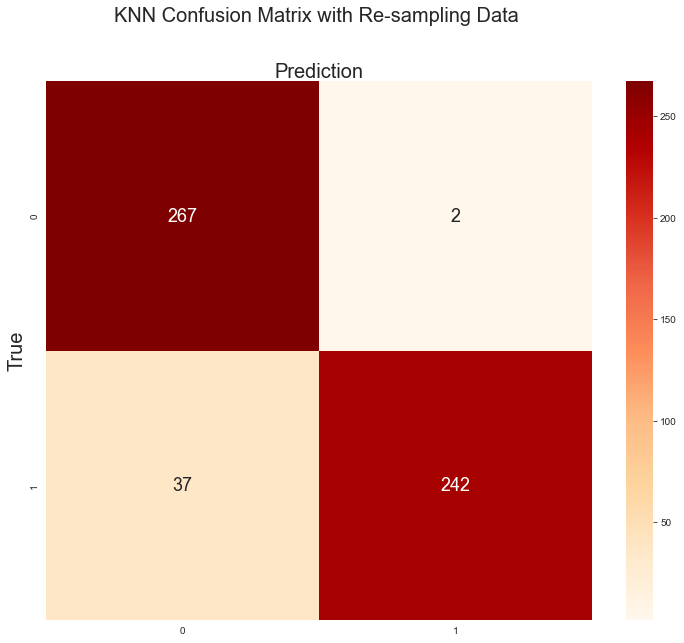

In [43]:
Conf_matrix = confusion_matrix(y_test, y_pred_para_imb)
plot_cnf_matirx(Conf_matrix,'KNN Confusion Matrix with Re-sampling Data ')

In [44]:
accuracy = accuracy_score(y_test, y_pred_para_imb)*100
print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal to 92.88%


In [45]:
TN=Conf_matrix[0,0]
TP=Conf_matrix[1,1]
FN=Conf_matrix[1,0]
FP=Conf_matrix[0,1]

In [46]:
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),3))
print('Specificity or True Negative Rate = TN/(TN+FP) = ', round(TN/float(TN+FP),3))

Sensitivity or True Positive Rate = TP/(TP+FN) =  0.867
Specificity or True Negative Rate = TN/(TN+FP) =  0.993


In [47]:
print('Precision: %.3f' % precision_score(y_test, y_pred_para_imb))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_para_imb))

Precision: 0.992
F1 Score: 0.925


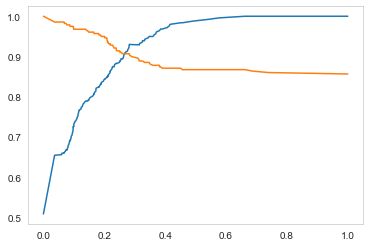

In [48]:
y_pred_para_imb = grid_search.predict_proba(X_test)[:,1]
precisions,recalls,thresholds = precision_recall_curve(y_test,y_pred_para_imb)
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])
plt.grid()
plt.show()

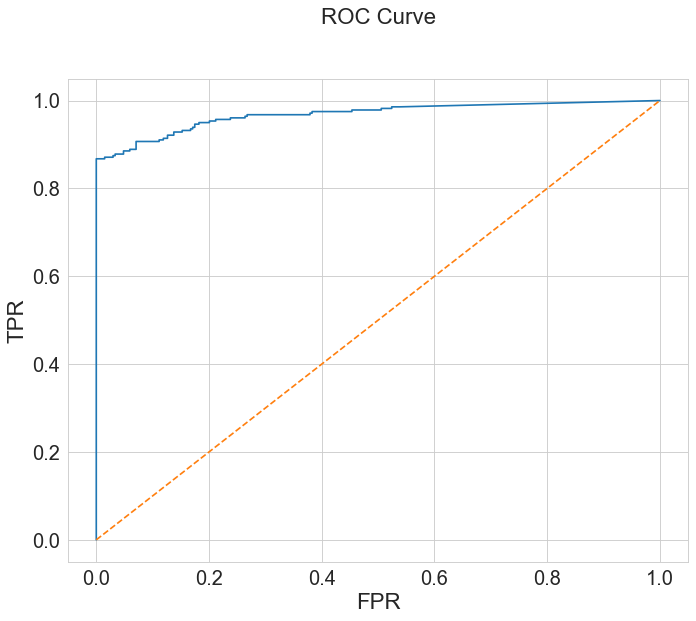

In [49]:
fprs,tprs,thresholds = roc_curve(y_test,y_pred_para_imb)
plot_roc_curve(fprs,tprs)

In [50]:
roc_auc_score(y_test,y_pred_para_imb)

0.9681949607600165